In [1]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")

  Activating 

project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


HR_mem (generic function with 1 method)

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, Statistics
x1 = y1 = z1 = x2 = y2 = z2  = interval(-10, 10)
z = interval(-100, 100)
box = x1 × y1 × z1 × x2 × y2 × z2 × z
using CairoMakie

In [3]:
function HR_mem(u, p, t)
    function sigma(x)
        return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
    end
    memristor(z, k1_me, k2_me) = k1_me + k2_me * z^2

    a, b, c, d, s, xr, r,  I, vs, k1, k2, k1_me, k2_me  = p
    x1, y1, z1, x2, y2, z2, z = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + memristor(z, k1_me, k2_me)*(x2 - x1)
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )                                                                                                                                          
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + memristor(z, k1_me, k2_me)*(x1 - x2)
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )

    du7 = x1 - x2
    
    return SVector(du1, du2, du3, du4, du5, du6, du7)
end

HR_mem (generic function with 1 method)

In [4]:
@inbounds function jacob_HR_mem(u, p, t)

    a, b, c, d, s, xr, r,  I, vs, k1, k2, k1_me, k2_me  = p
    x1, y1, z1, x2, y2, z2, z = u

    function sigma(x)
        return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
    end
    memristor(z, k1_me, k2_me) = k1_me + k2_me * z^2

    sigmax1der = 10.0 * exp( -10.0*( x1 + 0.25 ) ) / ( 1.0 + exp( -10.0*( x1 + 0.25 ) ) )^2
    sigmax2der = 10.0 * exp( -10.0*( x2 + 0.25 ) ) / ( 1.0 + exp( -10.0*( x2 + 0.25 ) ) )^2
    
    x1x1 = 2.0*b*x1 - 3.0 * a * x1^2 - k1 * sigma(x2) - memristor(z, k1_me, k2_me)
    x1y1 = 1.0
    x1z1 = -1.0
    x1x2 = -k1 * ( x1 - vs ) * sigmax2der + memristor(z, k1_me, k2_me)
    x1y2 = 0.0
    x1z2 = 0.0
    x1z = k2_me * 2.0 * z * ( x2 - x1 )

    y1x1 = -2.0 * d * x1
    y1y1 = -1.0
    y1z1 = 0.0
    y1x2 = 0.0
    y1y2 = 0.0
    y1z2 = 0.0
    y1z = 0.0

    z1x1 = r * s
    z1y1 = 0.0
    z1z1 = -r
    z1x2 = 0.0
    z1y2 = 0.0
    z1z2 = 0.0
    z1z = 0.0

    zx1 = 1.0
    zy1 = 0.0
    zz1 = 0.0
    zx2 = -1.0
    zy2 = 0.0
    zz2 = 0.0

    zz = 0.0

    # -------------------------------------

    x2x2 = 2.0*b*x2 - 3.0 * a * x2^2 - k2 * sigma(x1) - memristor(z, k1_me, k2_me)
    x2y2 = 1.0
    x2z2 = -1.0
    x2x1 = -k2 * ( x2 - vs ) * sigmax1der + memristor(z, k1_me, k2_me)
    x2y1 = 0.0
    x2z1 = 0.0
    x2z = k2_me * 2.0 * z * ( x1 - x2 )

    y2x2 = -2.0 * d * x2
    y2y2 = -1.0
    y2z2 = 0.0
    y2x1 = 0.0
    y2y1 = 0.0
    y2z1 = 0.0
    y2z = 0.0

    z2x2 = r * s
    z2y2 = 0.0
    z2z2 = -r
    z2x1 = 0.0
    z2y1 = 0.0
    z2z1 = 0.0
    z2z = 0.0

    zx2 = -1.0
    zy2 = 0.0
    zz2 = 0.0
    zx1 = 1.0
    zy1 = 0.0
    zz1 = 0.0



    SMatrix{7,7}(x1x1, y1x1, z1x1, x2x1, y2x1, z2x1, zx1,
    x1y1, y1y1, z1y1, x2y1, y2y1, z2y1, zy1,
    x1z1, y1z1, z1z1, x2z1, y2z1, z2z1, zz1,
    x1x2, y1x2, z1x2, x2x2, y2x2, z2x2, zx2,
    x1y2, y1y2, z1y2, x2y2, y2y2, z2y2, zy2,
    x1z2, y1z2, z1z2, x2z2, y2z2, z2z2, zz2,
    x1z, y1z, z1z, x2z, y2z, z2z, zz)
end

jacob_HR_mem (generic function with 1 method)

In [35]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0;
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0;                                                                                                                        
k1= -0.17; k2 = -0.17;
k1_me= 0.2 # 0.2
k2_me = 0.42 #0.42474916387959866 # 0.4180602006688963
u0 = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0, 0.0]
p = [a, b, c, d, s, xr, r, I, xv, k1, k2, k1_me, k2_me];

In [36]:
tstart = 0.0
tend = 5000.0
tspan = (tstart, tend)
tstep = 0.001

0.001

In [17]:
another = [-0.5191345591508597
-0.20806201734476223
 4.708031581180823
-0.5191345591508597
-0.20806201734476223
 4.708031581180823
 1.7613505759545642];

In [45]:
u0cont = sol[end]

7-element SVector{7, Float64} with indices SOneTo(7):
 -0.10036451133744957
  0.3916497156479014
  3.8346569524885092
 -0.10036451133744957
  0.3916497156479014
  3.8346569524885092
 16.053596420173978

In [42]:
prob = ODEProblem(HR_mem, u0cont, tspan, p)

ODEProblem with uType SVector{7, Float64} and tType Float64. In-place: false
timespan: (0.0, 5000.0)
u0: 7-element SVector{7, Float64} with indices SOneTo(7):
 -0.7947448267984675
 -2.578184450214632
  3.756190546012891
 -0.7947448267984675
 -2.578184450214632
  3.756190546012891
 16.053596420173978

In [43]:
sol = solve(prob, Vern9(), abstol = 1e-14, reltol = 1e-14, maxiters = 5000000);

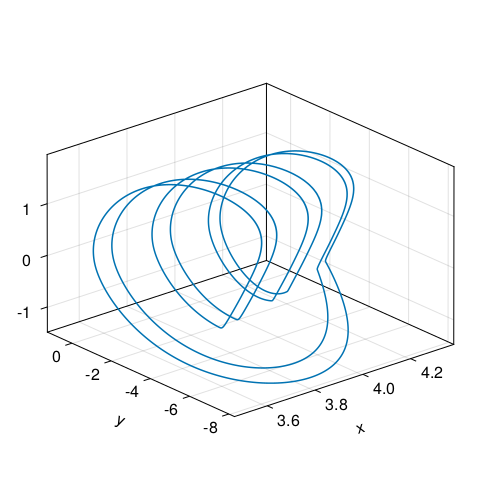

CairoMakie.Screen{IMAGE}


In [50]:
indexx, indexy, indexz = 3, 5, 1
tstart, tend = 1, 100000
f = Figure(resolution = (500, 500))
axis3d = Axis3(f[1, 1])
lines!(axis3d, sol[indexx, tstart:tend], sol[indexy, tstart:tend], sol[indexz, tstart:tend])
display(f)

In [51]:
integ_set = (alg = RK4(), adaptive = true, abstol = 1e-14, reltol = 1e-14)
ds = CoupledODEs(HR_mem, u0cont, p, diffeq = integ_set)

7-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  HR_mem
 ODE solver:    RK4
 ODE kwargs:    (adaptive = true, abstol = 1.0e-14, reltol = 1.0e-14)
 parameters:    [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, -0.17, -0.17, 0.2, 0.42]
 time:          0.0
 state:         [-0.10036451133744957, 0.3916497156479014, 3.8346569524885092, -0.10036451133744957, 0.3916497156479014, 3.8346569524885092, 16.053596420173978]


In [52]:
Λs = lyapunovspectrum(ds, 5000)

7-element Vector{Float64}:
   0.3323517592234304
   0.01591688587378811
   0.013619449509672345
   0.006705533726092755
  -0.684493267645436
  -8.60361705966712
 -Inf